In [1]:
import pickle
import numpy as np

In [2]:
import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))

#to get latex to work, shoulldn't be necessary for most ppl
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']

In [3]:
###
N_runs = 2
# number of pixels for the flat map
nX = 400 # 1200
nY = 400 #1200
template_fname = 'Cls_%dx%d.pkl'%(nX,nY)
###

In [4]:
f = open(template_fname, 'rb') 
Cls_tot = pickle.load(f)

In [5]:
final_keys = ['(Auto QE)-(Power Spectrum(hat NL))', 
              '(Auto QE)-(Power Spectrum(hat NL)) [M]',
              '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]']


In [6]:
for i in range(N_runs-1):
    for key in final_keys:
        assert(all(Cls_tot[key][i][0] == Cls_tot[key][i+1][0]))
lCen =  Cls_tot[final_keys[0]][0][0]
Cls = {}
sCls = {}
for key in final_keys:
    Cls[key] = np.sum(np.transpose(Cls_tot[key], axes=[1,2,0])[1], axis=1)/N_runs
    sCls[key] = np.sqrt(np.sum(np.square(np.transpose(Cls_tot[key], axes=[1,2,0])[2]), axis=1))/np.sqrt(N_runs)

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.421677023466593e-07, 3.6519537062004146e-07), (0.0, 0.0), (5.087298648574051e-07, 6.190637883902026e-07), (0.0, 0.0), (1.3733410325312807e-07, 1.2593127411653048e-07), (0.0, 0.0), (1.110761821481718e-07, 9.216472326155305e-08), (1.435095807722398e-07, 1.2439384761093008e-07), (9.984985835334082e-08, 8.603557498647383e-08), (8.974719049965673e-08, 5.7781197919385615e-08), (7.158792297798453e-08, 5.350349274493051e-08), (7.650880675115006e-08, 4.3906603788338103e-08), (4.416745230715978e-08, 2.9379440527819068e-08), (3.0616654091389823e-08, 2.3015936090075034e-08), (3.032967370910594e-08, 1.9690963899270686e-08), (3.917659433451122e-08, 1.6310267402831576e-08), (1.8091927393920117e-08, 1.1800100164439094e-08), (5.106102693220776e-09, 8.619203934637867e-09), (1

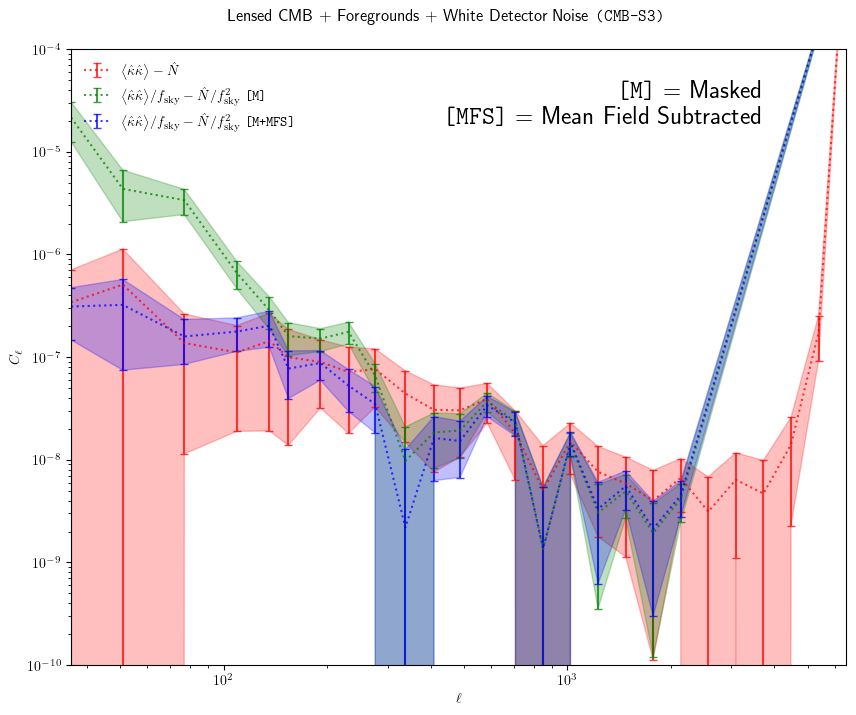

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, figsize=(10,8), sharey=True)
axs = [axs]
fig.subplots_adjust(wspace=0, hspace=0)

# ell = baseMap.l.flatten()
factor = 1. # lCen**2
labels ={'Standard QE': r'${\big<\hat \kappa \hat\kappa \big>}$',
        'AFC Eq(7)': r'Computed noise $\hat N$',
        '(Auto QE)-(Power Spectrum(hat NL))': r'${\big<\hat \kappa \hat\kappa \big>- \hat N}$',
        'Standard QE Masked MFS': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M+MFS]}',
        'AFC Eq(7) Masked MFS': r'Computed noise $\hat N$ \texttt{[M+MFS]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M+MFS]}',
        'Standard QE Masked': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M]}',
        'AFC Eq(7) Masked': r'Computed noise $\hat N$ \texttt{[M]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M]}'
}

col = {'Standard QE': 'r',
        'Standard QE Masked MFS': 'b',
        'AFC Eq(7)': 'r',
        'AFC Eq(7) Masked MFS': 'b',
        '(Auto QE)-(Power Spectrum(hat NL))': 'r',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': 'b',
        'Standard QE Masked': 'g',
        'AFC Eq(7) Masked': 'g',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': 'g',

}

##################################

bnds = {'x':[],'y':[]}
for key in final_keys:    
    Cl = Cls[key]
    sCl = sCls[key]
    Ipos = np.where(Cl>=1e-10)
    Ineg = np.where(Cl<0.)

    ax = axs[0]
    fctr = factor
    print(list(zip(Cl, sCl)))
    ax.errorbar(lCen[Ipos], factor*(Cl[Ipos]), yerr=fctr*sCl[Ipos], c=col[key], alpha=.75, fmt=':', capsize=3, label=labels[key], capthick=1)
    tmp_data = {
       'x': lCen[Ipos],
       'y1': [y - e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])],
       'y2': [y + e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])]}
    ax.fill_between(**tmp_data, color=col[key], alpha=.25)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$C_\ell$')

    bnds['x'] += [np.min(lCen), np.max(lCen)]
    bnds['y'] += [np.min(Cl[Ipos]), factor*np.max(Cl[Ipos])]


fig.suptitle(r'Lensed CMB + Foregrounds + White Detector Noise \texttt{(CMB-S3)}', y=0.93)

for ax in axs:
    ax.set_xlim(np.min(bnds['x']), np.max(bnds['x']))
    ax.set_ylim(1e-10, 1e-4)
    print(np.max(bnds['y']))


    l=ax.legend(frameon=False, loc='upper left')
    s = r'\texttt{[M]} = Masked'
    s += '\n'
    s += r'\texttt{[MFS]} = Mean Field Subtracted'
    ax.text(.90, .95,
       s=s,
       transform=ax.transAxes,
       horizontalalignment='right',
       verticalalignment='top',
      fontsize=18)





In [10]:
plt.rcParams.update({
    "text.usetex": True,})